# Quality of Health Care - Logistic Regression
By - Divit Saini

### Background:

D2Hawkeye, a medical data mining company.


The company receives claims data.


These are data that are generated when an insured patient goes to a medical provider to receive a diagnosis or to have a procedure, for example an x-ray, or to obtain drugs. 
The medical providers need to get compensated, so the claims data provide the means for them to be paid.


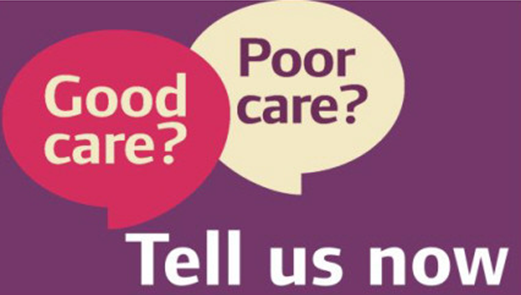

### Dataset Description:

The variables in the dataset quality.csv are as follows: 
1. **MemberID** : numbers the patients from 1 to 131, and is just an identifying number.

2. **InpatientDays** : is the number of inpatient visits, or number of days the person spent in the hospital.

3. **ERVisits** : is the number of times the patient visited the emergency room.

4. **OfficeVisits** : is the number of times the patient visited any doctor's office.

5. **Narcotics** : is the number of prescriptions the patient had for narcotics.

6. **DaysSinceLastERVisit** is the number of days between the patient's last emergency room visit and the end of the study period (set to the length of the study period if they never visited the ER).

7. **Pain** : is the number of visits for which the patient complained about pain.

8. **TotalVisits** : is the total number of times the patient visited any healthcare provider.

9. **ProviderCount** : is the number of providers that served the patient.

10. **MedicalClaims**: is the number of days on which the patient had a medical claim.

11. **ClaimLines** :  is the total number of medical claims.

12. **StartedOnCombination**: is whether or not the patient was started on a combination of drugs to treat their diabetes (TRUE or FALSE). [**Categorical**]

13. **AcuteDrugGapSmall**: is the fraction of acute drugs that were refilled quickly after the prescription ran out.

14. *PoorCare* : is the outcome or dependent variable, and is equal to 1 if the patient had poor care, and equal to 0 if the patient had good care. 


In [1]:
('MemberID',
 'InpatientDays',
 'ERVisits',
 'OfficeVisits',
 'Narcotics',
 'DaysSinceLastERVisit',
 'Pain',
 'ProviderCount',
 'ClaimLines',
 'StartedOnCombination')

### Objective:

D2Hawkeye has to use the medical history/reports of the patients given in the dataset too tell the insurace company whether Good/Poor Care was given.

### Methodology:

We use logistic Regression to classify each member in two categories (Good Care (0) or Poor Care(1))

The Steps that we are going to follow to complete this implementation is as follows:

1. **Importing the necessary libraries**


2. **Data Loading and Data Cleaning**


3. **Exploratory Data Analysis**: Discover and visualise data while finding correlations


4. **Creating Feature matrix and Target Array**: Splitting the dataset into independent (x) and dependent (y) variables.


5. **Train-Test Split**


6. **Feature Selection**
    1. Without feature selection (Model Creation and evaluation)
        
    2. Feature selection
        1. Forward selection
            1. Manual one by one addition
            2. Using Sequential Feature Selection Class
       
        2. Backward elimination
     
        3. Recursive Feature Elimination
        
    3. Table Comparison - Selection of Best Features to train the model
        
        
7. **Model Creation and Evaluation based on the best features selected by RFE and Backward Elimination**

8. **Model Selection and Conclusion**

### Points to remember while analysing:

1. We concentrate more on the poor care (*Class 1*) than the ones recieving good care:
2. Categorising **A Poor Care Patient as Good Care will be a blunder (False Negative)** , but Categorising a Good Care patient (False Positive) should not be a major concern.

In [2]:
pip install jupyter_contrib_nbextensions


Note: you may need to restart the kernel to use updated packages.


## 1. Importing the necessary libraries

In [3]:
pip install pandas_profiling

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, confusion_matrix, precision_score, recall_score, roc_curve, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp

## 2. Data Loading and Data Cleaning

In [5]:
quality = pd.read_csv("https://storage.googleapis.com/dimensionless/Analytics/quality.csv")
quality.head()

MemberID  InpatientDays  ERVisits  OfficeVisits  Narcotics  \
0         1              0         0            18          1   
1         2              1         1             6          1   
2         3              0         0             5          3   
3         4              0         1            19          0   
4         5              8         2            19          3   

   DaysSinceLastERVisit  Pain  TotalVisits  ProviderCount  MedicalClaims  \
0                 731.0    10           18             21             93   
1                 411.0     0            8             27             19   
2                 731.0    10            5             16             27   
3                 158.0    34           20             14             59   
4                 449.0    10           29             24             51   

   ClaimLines  StartedOnCombination  AcuteDrugGapSmall  PoorCare  
0         222                 False                  0         0  
1         115                 False                  1         0  
2         148                 False                  5         0  
3         242                 False                  0         0  
4         204                 False                  0         0

In [6]:
quality.shape

(131, 14)

In [7]:
quality.describe()

MemberID  InpatientDays    ERVisits  OfficeVisits   Narcotics  \
count  131.000000     131.000000  131.000000    131.000000  131.000000   
mean    66.000000       2.717557    1.496183     13.229008    4.572519   
std     37.960506       5.099434    2.167501      9.077076    9.713615   
min      1.000000       0.000000    0.000000      0.000000    0.000000   
25%     33.500000       0.000000    0.000000      7.000000    0.000000   
50%     66.000000       0.000000    1.000000     12.000000    1.000000   
75%     98.500000       3.000000    2.000000     18.500000    3.000000   
max    131.000000      30.000000   11.000000     46.000000   59.000000   

       DaysSinceLastERVisit        Pain  TotalVisits  ProviderCount  \
count            131.000000  131.000000   131.000000     131.000000   
mean             480.567112   15.557252    17.442748      23.984733   
std              274.767240   20.418001    12.298318      13.670285   
min                6.000000    0.000000     0.000000       5.000000   
25%              206.958333    1.000000     8.000000      15.000000   
50%              640.958333    8.000000    15.000000      20.000000   
75%              731.000000   23.000000    22.500000      30.000000   
max              731.000000  104.000000    69.000000      82.000000   

       MedicalClaims  ClaimLines  AcuteDrugGapSmall    PoorCare  
count     131.000000  131.000000         131.000000  131.000000  
mean       43.244275  142.862595           2.694656    0.251908  
std        28.886540   91.629921           6.983379    0.435775  
min        11.000000   20.000000           0.000000    0.000000  
25%        25.500000   83.500000           0.000000    0.000000  
50%        37.000000  120.000000           1.000000    0.000000  
75%        49.500000  185.000000           3.000000    0.500000  
max       194.000000  577.000000          71.000000    1.000000

**Outlier Analysis:**

Possible Variables having outliers are Inpateint Days, ClaimLines, MedicalClaims, Pain, AcuteDrugGapSmall, Narcotics.

In [8]:
print(quality.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MemberID              131 non-null    int64  
 1   InpatientDays         131 non-null    int64  
 2   ERVisits              131 non-null    int64  
 3   OfficeVisits          131 non-null    int64  
 4   Narcotics             131 non-null    int64  
 5   DaysSinceLastERVisit  131 non-null    float64
 6   Pain                  131 non-null    int64  
 7   TotalVisits           131 non-null    int64  
 8   ProviderCount         131 non-null    int64  
 9   MedicalClaims         131 non-null    int64  
 10  ClaimLines            131 non-null    int64  
 11  StartedOnCombination  131 non-null    bool   
 12  AcuteDrugGapSmall     131 non-null    int64  
 13  PoorCare              131 non-null    int64  
dtypes: bool(1), float64(1), int64(12)
memory usage: 13.6 KB
None


**Missing Value Analysis:**
No missing Values found

In [9]:
#baseline model accuracy = 98/(98+33)  = 0.748 (0 = high quality care)
quality['PoorCare'].value_counts()
#based on the dominant class (In this case Good Care)

0    98
1    33
Name: PoorCare, dtype: int64

## 3. Exploratory Data Analysis: Discover and visualise data while finding correlations

In [10]:
pp.ProfileReport(quality)

In [11]:
corr_matrix = quality.corr()
corr_matrix

MemberID  InpatientDays  ERVisits  OfficeVisits  \
MemberID              1.000000      -0.063620 -0.011032     -0.006273   
InpatientDays        -0.063620       1.000000  0.440087      0.175901   
ERVisits             -0.011032       0.440087  1.000000      0.308526   
OfficeVisits         -0.006273       0.175901  0.308526      1.000000   
Narcotics             0.203962      -0.093769 -0.003732      0.275759   
DaysSinceLastERVisit  0.100174      -0.290121 -0.735246     -0.128388   
Pain                  0.023700       0.304058  0.546779      0.352968   
TotalVisits          -0.032954       0.622036  0.586439      0.865387   
ProviderCount         0.012511       0.244023  0.457429      0.365469   
MedicalClaims        -0.065212       0.286378  0.355319      0.498513   
ClaimLines           -0.090459       0.386951  0.542001      0.424953   
StartedOnCombination -0.144841       0.105626  0.118766      0.164056   
AcuteDrugGapSmall     0.196651      -0.001144 -0.072750      0.200735   
PoorCare              0.060916       0.080726  0.135401      0.329512   

                      Narcotics  DaysSinceLastERVisit      Pain  TotalVisits  \
MemberID               0.203962              0.100174  0.023700    -0.032954   
InpatientDays         -0.093769             -0.290121  0.304058     0.622036   
ERVisits              -0.003732             -0.735246  0.546779     0.586439   
OfficeVisits           0.275759             -0.128388  0.352968     0.865387   
Narcotics              1.000000              0.065055  0.106860     0.163992   
DaysSinceLastERVisit   0.065055              1.000000 -0.358781    -0.344640   
Pain                   0.106860             -0.358781  1.000000     0.482959   
TotalVisits            0.163992             -0.344640  0.482959     1.000000   
ProviderCount          0.293478             -0.297701  0.405095     0.451545   
MedicalClaims          0.220541             -0.198114  0.296697     0.549308   
ClaimLines             0.185799             -0.412797  0.464713     0.569619   
StartedOnCombination   0.043641             -0.061953  0.078373     0.185814   
AcuteDrugGapSmall      0.710889              0.131085 -0.031490     0.134861   
PoorCare               0.447236             -0.107983  0.092168     0.300540   

                      ProviderCount  MedicalClaims  ClaimLines  \
MemberID                   0.012511      -0.065212   -0.090459   
InpatientDays              0.244023       0.286378    0.386951   
ERVisits                   0.457429       0.355319    0.542001   
OfficeVisits               0.365469       0.498513    0.424953   
Narcotics                  0.293478       0.220541    0.185799   
DaysSinceLastERVisit      -0.297701      -0.198114   -0.412797   
Pain                       0.405095       0.296697    0.464713   
TotalVisits                0.451545       0.549308    0.569619   
ProviderCount              1.000000       0.517002    0.605357   
MedicalClaims              0.517002       1.000000    0.813935   
ClaimLines                 0.605357       0.813935    1.000000   
StartedOnCombination       0.155765       0.067931    0.045934   
AcuteDrugGapSmall          0.141284       0.085637   -0.013229   
PoorCare                   0.220166       0.167399    0.129175   

                      StartedOnCombination  AcuteDrugGapSmall  PoorCare  
MemberID                         -0.144841           0.196651  0.060916  
InpatientDays                     0.105626          -0.001144  0.080726  
ERVisits                          0.118766          -0.072750  0.135401  
OfficeVisits                      0.164056           0.200735  0.329512  
Narcotics                         0.043641           0.710889  0.447236  
DaysSinceLastERVisit             -0.061953           0.131085 -0.107983  
Pain                              0.078373          -0.031490  0.092168  
TotalVisits                       0.185814           0.134861  0.300540  
ProviderCount                     0.155765           0.141284  0.220

In [12]:
sns.lmplot?

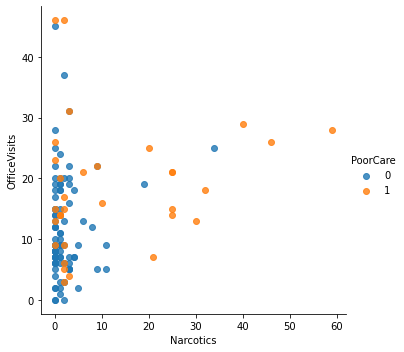

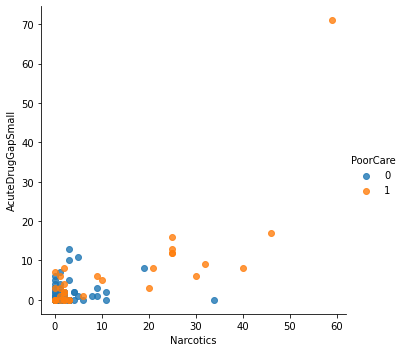

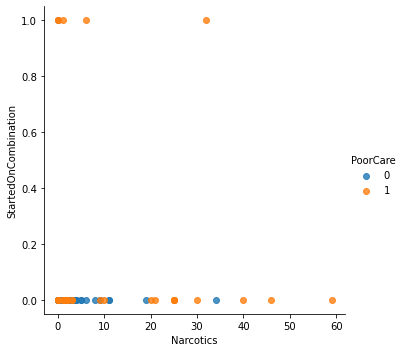

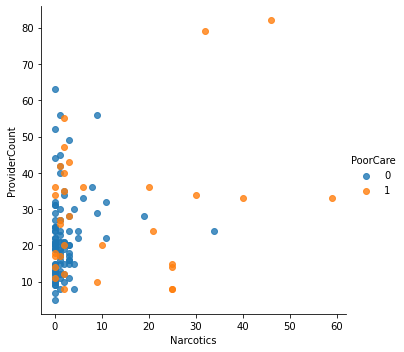

In [13]:
# Plotting the most correlated features (Narcotics) with different features
sns.lmplot("Narcotics", "OfficeVisits", quality, fit_reg = False, hue = "PoorCare", legend=True)
sns.lmplot("Narcotics", "AcuteDrugGapSmall", quality, fit_reg = False, hue = "PoorCare", legend=True)
sns.lmplot("Narcotics", "StartedOnCombination", quality, fit_reg = False, hue = "PoorCare", legend=True)
sns.lmplot("Narcotics", "ProviderCount", quality, fit_reg = False, hue = "PoorCare", legend=True)

As the narcotics increases, the poor care increases

## 4. Creating Feature matrix and Target Array/ Data Preprocessing

In [14]:
# Index location finder (rows , columns)
X = quality.iloc[:,0:13]
X.head()

MemberID  InpatientDays  ERVisits  OfficeVisits  Narcotics  \
0         1              0         0            18          1   
1         2              1         1             6          1   
2         3              0         0             5          3   
3         4              0         1            19          0   
4         5              8         2            19          3   

   DaysSinceLastERVisit  Pain  TotalVisits  ProviderCount  MedicalClaims  \
0                 731.0    10           18             21             93   
1                 411.0     0            8             27             19   
2                 731.0    10            5             16             27   
3                 158.0    34           20             14             59   
4                 449.0    10           29             24             51   

   ClaimLines  StartedOnCombination  AcuteDrugGapSmall  
0         222                 False                  0  
1         115                 False                  1  
2         148                 False                  5  
3         242                 False                  0  
4         204                 False                  0

In [15]:
y = quality['PoorCare']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: PoorCare, dtype: int64

### Feature scaling using Standard Scaler

In [16]:
#importing Standard scaler class fron sklearn preprocessing module
from sklearn.preprocessing import StandardScaler

#creating an object of the class StandardScaler
std_scaler = StandardScaler()

In [17]:
#separating independent variables to be scaled before training the data
X_unscaled = X.copy()
X_unscaled

MemberID  InpatientDays  ERVisits  OfficeVisits  Narcotics  \
0           1              0         0            18          1   
1           2              1         1             6          1   
2           3              0         0             5          3   
3           4              0         1            19          0   
4           5              8         2            19          3   
..        ...            ...       ...           ...        ...   
126       127              1         1             5          3   
127       128              1         0             3          2   
128       129             15        11             5          9   
129       130              0         2            14          1   
130       131             30         1            22          3   

     DaysSinceLastERVisit  Pain  TotalVisits  ProviderCount  MedicalClaims  \
0              731.000000    10           18             21             93   
1              411.000000     0            8             27             19   
2              731.000000    10            5             16             27   
3              158.000000    34           20             14             59   
4              449.000000    10           29             24             51   
..                    ...   ...          ...            ...            ...   
126            444.000000     0            7             11             11   
127            731.000000     0            4             35             18   
128            180.958333    95           31             56             43   
129            216.958333     5           16             26             41   
130            452.000000    38           53             20            103   

     ClaimLines  StartedOnCombination  AcuteDrugGapSmall  
0           222                 False                  0  
1           115                 False                  1  
2           148                 False                  5  
3           242                 False                  0  
4           204                 False                  0  
..          ...                   ...                ...  
126          36                 False                  0  
127         106                 False                  2  
128         265                 False                  3  
129         138                 False                  1  
130         189                 False                 13  

[131 rows x 13 columns]

In [18]:
std_scaler.fit(X_unscaled)

StandardScaler()

In [19]:
scaled_values = std_scaler.transform(X_unscaled)

#converting the array obtained of the scaled values to a dataframe
X_scaled = pd.DataFrame(scaled_values)

#Labelling the columns
X_scaled.columns = X.columns

X_scaled.describe()

MemberID  InpatientDays      ERVisits  OfficeVisits     Narcotics  \
count  1.310000e+02   1.310000e+02  1.310000e+02  1.310000e+02  1.310000e+02   
mean  -2.711995e-17  -5.423990e-17  1.355998e-17  2.966245e-17 -1.622960e-16   
std    1.003839e+00   1.003839e+00  1.003839e+00  1.003839e+00  1.003839e+00   
min   -1.718879e+00  -5.349592e-01 -6.929300e-01 -1.463003e+00 -4.725400e-01   
25%   -8.594396e-01  -5.349592e-01 -6.929300e-01 -6.888694e-01 -4.725400e-01   
50%    0.000000e+00  -5.349592e-01 -2.297982e-01 -1.359166e-01 -3.691966e-01   
75%    8.594396e-01   5.559970e-02  2.333336e-01  5.829219e-01 -1.625096e-01   
max    1.718879e+00   5.370630e+00  4.401520e+00  3.624162e+00  5.624725e+00   

       DaysSinceLastERVisit          Pain   TotalVisits  ProviderCount  \
count          1.310000e+02  1.310000e+02  1.310000e+02   1.310000e+02   
mean           2.447152e-17  2.372996e-17 -6.440989e-17  -9.873357e-17   
std            1.003839e+00  1.003839e+00  1.003839e+00   1.003839e+00   
min           -1.733791e+00 -7.648630e-01 -1.423748e+00  -1.394090e+00   
25%           -9.996064e-01 -7.156986e-01 -7.707556e-01  -6.597685e-01   
50%            5.859757e-01 -3.715478e-01 -1.993870e-01  -2.926076e-01   
75%            9.149353e-01  3.659182e-01  4.127935e-01   4.417142e-01   
max            9.149353e-01  4.348235e+00  4.208313e+00   4.260187e+00   

       MedicalClaims    ClaimLines  StartedOnCombination  AcuteDrugGapSmall  
count   1.310000e+02  1.310000e+02          1.310000e+02       1.310000e+02  
mean    1.152598e-16 -1.144123e-16          7.712236e-17      -5.423990e-17  
std     1.003839e+00  1.003839e+00          1.003839e+00       1.003839e+00  
min    -1.120524e+00 -1.346004e+00         -2.190890e-01      -3.873484e-01  
25%    -6.166329e-01 -6.503386e-01         -2.190890e-01      -3.873484e-01  
50%    -2.169954e-01 -2.504680e-01         -2.190890e-01      -2.436015e-01  
75%     2.173933e-01  4.616304e-01         -2.190890e-01       4.389217e-02  
max     5.238926e+00  4.756132e+00          4.564355e+00       9.818678e+00

## 5. Train-Test Split

Train/test split


1. Split the dataset into two pieces, so that the model can be trained and tested on different data
2. Testing accuracy is a better estimate than training accuracy of out-of-sample performance
3. Problem with train/test split
    1. It provides a high variance estimate since changing which observations happen to be in the testing set can significantly change testing accuracy
    2. Testing accuracy can change a lot depending on a which observation happen to be in the testing set


Reference:
http://www.ritchieng.com/machine-learning-cross-validation/

In [20]:
#stratify =y makes sure the y_train and y_test baseline model accuracy is the same as previous by calculating the split keeping the ratio of 0s and 1s to be the same

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 10, stratify = y)

In [21]:
print(X_train.shape)
print(y_train.shape)

(104, 13)
(104,)


In [22]:
print(X_test.shape)
print(y_test.shape)

(27, 13)
(27,)


In [23]:
# The accuracy w.r.t to dominant category is the same as the baseline-model by the use of stratify
print(y_train.value_counts())
print(y_test.value_counts())

0    78
1    26
Name: PoorCare, dtype: int64
0    20
1     7
Name: PoorCare, dtype: int64


## 6. Logistic Regression

### A. Without feature selection

#### 1. Training a model with all variables

In [24]:
model_all = LogisticRegression()

In [25]:
model_all.fit(X_train, y_train) # building model on poorCare (all variables)

LogisticRegression()

In [26]:
# accuracy score ((TP+TN)/(Total Rows))
model_all.score(X_train, y_train)

0.875

means it can classify 87 ponts out of 100 correctly to good care

In [27]:
y_pred_train_all = model_all.predict(X_train)
y_pred_train_all

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [28]:
#gives the probability of 0s (1st column) and 1s (2nd Column)
pred_train_prob_all = model_all.predict_proba(X_train)
pred_train_prob_all

array([[8.81161535e-01, 1.18838465e-01],
       [9.41147116e-01, 5.88528840e-02],
       [8.66461309e-01, 1.33538691e-01],
       [9.08656729e-01, 9.13432713e-02],
       [9.28267274e-01, 7.17327262e-02],
       [1.42040976e-02, 9.85795902e-01],
       [8.27203127e-01, 1.72796873e-01],
       [9.87055131e-01, 1.29448685e-02],
       [8.63303680e-02, 9.13669632e-01],
       [8.27057287e-01, 1.72942713e-01],
       [7.93103269e-01, 2.06896731e-01],
       [9.15882249e-01, 8.41177508e-02],
       [7.32022093e-01, 2.67977907e-01],
       [5.71278712e-01, 4.28721288e-01],
       [9.00812302e-01, 9.91876981e-02],
       [5.38451925e-01, 4.61548075e-01],
       [9.70630996e-01, 2.93690042e-02],
       [7.31822413e-01, 2.68177587e-01],
       [6.30193194e-01, 3.69806806e-01],
       [8.42135289e-01, 1.57864711e-01],
       [9.54064995e-01, 4.59350055e-02],
       [5.60561244e-01, 4.39438756e-01],
       [9.23947709e-01, 7.60522909e-02],
       [9.60784127e-01, 3.92158733e-02],
       [3.127764

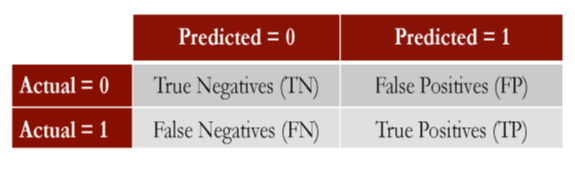

In [29]:
conf_all = confusion_matrix(y_train, y_pred_train_all)
conf_all
# 77 = true Negative ; 1 = false Positive
# 12 = false Negative ; 14 = True Positive

array([[77,  1],
       [12, 14]], dtype=int64)

In [30]:
acc_score_all = accuracy_score(y_train, y_pred_train_all)
acc_score_all

0.875

In [31]:
summary_all = classification_report(y_train, y_pred_train_all)
print(summary_all)

              precision    recall  f1-score   support

           0       0.87      0.99      0.92        78
           1       0.93      0.54      0.68        26

    accuracy                           0.88       104
   macro avg       0.90      0.76      0.80       104
weighted avg       0.88      0.88      0.86       104



In [32]:
sensitivity_all = recall_score(y_train, y_pred_train_all)
sensitivity_all

0.5384615384615384

In [33]:
precision_all = precision_score(y_train, y_pred_train_all)
precision_all

0.9333333333333333

##### ROC Curve

In [34]:
roc_curve?

In [35]:
# based on Class 1 which is in he 2nd column of the probabilities obtained
fpr_all, tpr_all, t_all = roc_curve(y_train, pred_train_prob_all[:,1], pos_label = 1)

In [36]:
fpr_all

array([0.        , 0.        , 0.        , 0.01282051, 0.01282051,
       0.02564103, 0.02564103, 0.05128205, 0.05128205, 0.06410256,
       0.06410256, 0.19230769, 0.19230769, 0.21794872, 0.21794872,
       0.25641026, 0.25641026, 0.29487179, 0.29487179, 0.34615385,
       0.34615385, 0.42307692, 0.42307692, 0.6025641 , 0.6025641 ,
       1.        ])

In [37]:
tpr_all

array([0.        , 0.03846154, 0.42307692, 0.42307692, 0.53846154,
       0.53846154, 0.61538462, 0.61538462, 0.65384615, 0.65384615,
       0.69230769, 0.69230769, 0.76923077, 0.76923077, 0.80769231,
       0.80769231, 0.84615385, 0.84615385, 0.88461538, 0.88461538,
       0.92307692, 0.92307692, 0.96153846, 0.96153846, 1.        ,
       1.        ])

In [38]:
t_all

array([1.99999973, 0.99999973, 0.74798925, 0.68722352, 0.57791842,
       0.47804486, 0.4551435 , 0.42872129, 0.40746628, 0.40291524,
       0.36980681, 0.24433773, 0.23367513, 0.2306234 , 0.22009127,
       0.20893123, 0.20689673, 0.17294271, 0.17279687, 0.1408844 ,
       0.13944568, 0.11598126, 0.11524213, 0.08411775, 0.07646948,
       0.00800692])

In [39]:
pred_train_prob_all[:,1]

array([0.11883846, 0.05885288, 0.13353869, 0.09134327, 0.07173273,
       0.9857959 , 0.17279687, 0.01294487, 0.91366963, 0.17294271,
       0.20689673, 0.08411775, 0.26797791, 0.42872129, 0.0991877 ,
       0.46154807, 0.029369  , 0.26817759, 0.36980681, 0.15786471,
       0.04593501, 0.43943876, 0.07605229, 0.03921587, 0.68722352,
       0.0701609 , 0.57791842, 0.03953386, 0.03238127, 0.05728804,
       0.28327966, 0.23367513, 0.10187009, 0.26043882, 0.08520067,
       0.07500444, 0.1210429 , 0.07646948, 0.04360154, 0.11524213,
       0.74798925, 0.01680155, 0.4551435 , 0.09689152, 0.00800692,
       0.0434158 , 0.91611509, 0.40746628, 0.2727444 , 0.1408844 ,
       0.32231674, 0.04598193, 0.47804486, 0.23160764, 0.09143583,
       0.10177642, 0.11609835, 0.08517102, 0.1267941 , 0.06648738,
       0.97989289, 0.95723169, 0.10880098, 0.18894848, 0.02877266,
       0.2306234 , 0.01703837, 0.08436204, 0.029635  , 0.21364252,
       0.08885918, 0.9998499 , 0.03607933, 0.82981902, 0.14514

Observation:
t_all is the unique values of probabilties of the prediction of class 1

Text(0, 0.5, 'True Positive Rate (TPR)')

<Figure size 720x360 with 0 Axes>

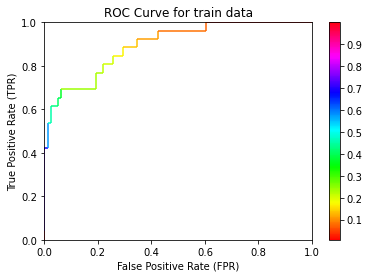

In [40]:
from matplotlib.collections import LineCollection
import matplotlib as mpl
l1 = []
for i in range(len(fpr_all)-1):
    l1.append([(fpr_all[i],tpr_all[i]),(fpr_all[i+1],tpr_all[i+1])])
#print(l1)
lc = LineCollection(l1, cmap='hsv')
plt.figure(figsize=(10,5))
fig, ax = plt.subplots()
line=ax.add_collection(lc)
lc.set_array(t_all[1:])
plt.colorbar(line, ticks=np.arange(0,1,0.1))
plt.title("ROC Curve for train data")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")

In [41]:
auc_all = auc(fpr_all,tpr_all)
auc_all

0.8949704142011834

##### Applying Threshold on Predictions

In [42]:
pred_t_all_train = np.where(pred_train_prob_all[:,1]>=0.35, 1, 0)
pred_t_all_train

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1])

In [43]:
conf_all_t = confusion_matrix(y_train, pred_t_all_train)
conf_all_t

array([[73,  5],
       [ 8, 18]], dtype=int64)

In [44]:
accuracy_all_t = accuracy_score(y_train, pred_t_all_train)
accuracy_all_t

0.875

In [45]:
sensitivity_all_t = recall_score(y_train, pred_t_all_train)
sensitivity_all_t

0.6923076923076923

In [46]:
precision_all_t = precision_score(y_train, pred_t_all_train)
precision_all_t

0.782608695652174

In [47]:
summary_all_t =classification_report(y_train, pred_t_all_train)
print(summary_all_t)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        78
           1       0.78      0.69      0.73        26

    accuracy                           0.88       104
   macro avg       0.84      0.81      0.83       104
weighted avg       0.87      0.88      0.87       104



#### 2. Testing the model

In [48]:
y_pred_test_all = model_all.predict(X_test)
y_pred_test_all


array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [49]:
conf_all_t_05 = confusion_matrix(y_test, y_pred_test_all)
conf_all_t_05

array([[18,  2],
       [ 6,  1]], dtype=int64)

In [50]:
accuracy_all_test_t_05 = accuracy_score(y_test,y_pred_test_all )
accuracy_all_test_t_05

0.7037037037037037

In [51]:
sensitivity_all_test_t_05 = recall_score(y_test, y_pred_test_all)
sensitivity_all_test_t_05

0.14285714285714285

In [52]:
summary_all_test_05 = classification_report(y_test, y_pred_test_all)
print(summary_all_test_05)

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        20
           1       0.33      0.14      0.20         7

    accuracy                           0.70        27
   macro avg       0.54      0.52      0.51        27
weighted avg       0.64      0.70      0.66        27



##### Customising t value to 0.35 in test

In [53]:
pred_test_prob_all = model_all.predict_proba(X_test)[:, 1]
pred_test_prob_all

array([2.95784889e-01, 8.93604023e-01, 3.83826308e-01, 4.41473221e-02,
       9.04928960e-02, 1.56417984e-01, 9.67724514e-01, 4.91103723e-02,
       1.41948176e-01, 3.10849223e-02, 4.18866864e-01, 7.74018046e-02,
       1.26803981e-01, 5.11476853e-01, 1.50978358e-01, 1.06560387e-01,
       2.40515833e-01, 3.68159091e-02, 4.04236322e-02, 8.87646455e-02,
       1.74565413e-01, 3.27352641e-02, 8.22757753e-04, 3.82769327e-01,
       1.02235963e-01, 1.29795813e-01, 1.30930948e-01])

In [54]:
# applying the threshold of 0.35 on the test data
pred_t_all_test = np.where(pred_test_prob_all>=0.35, 1, 0)
pred_t_all_test

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0])

In [55]:
conf_all_t = confusion_matrix(y_test, pred_t_all_test)
conf_all_t

array([[17,  3],
       [ 4,  3]], dtype=int64)

In [56]:
accuracy_all_test_t_035 = accuracy_score(y_test, pred_t_all_test)
accuracy_all_test_t_035

0.7407407407407407

In [57]:
sensitivity_all_test_t_035 = recall_score(y_test, pred_t_all_test)
sensitivity_all_test_t_035

0.42857142857142855

In [58]:
summary_all_test_035 = classification_report(y_test, pred_t_all_test)
print(summary_all_test_035)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        20
           1       0.50      0.43      0.46         7

    accuracy                           0.74        27
   macro avg       0.65      0.64      0.65        27
weighted avg       0.73      0.74      0.73        27



##### ROC CURVE Test data

Text(0, 0.5, 'True Positive Rate (TPR)')

<Figure size 720x360 with 0 Axes>

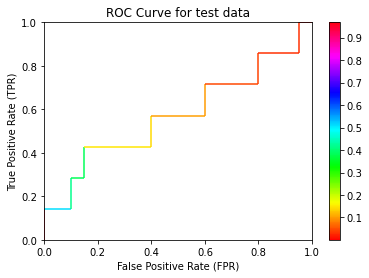

In [59]:
fpr_test_all, tpr_test_all, t_test_all = roc_curve(y_test, pred_test_prob_all, pos_label = 1)
from matplotlib.collections import LineCollection
import matplotlib as mpl
l1 = []
for i in range(len(fpr_test_all)-1):
    l1.append([(fpr_test_all[i],tpr_test_all[i]),(fpr_test_all[i+1],tpr_test_all[i+1])])
#print(l1)
lc = LineCollection(l1, cmap='hsv')
plt.figure(figsize=(10,5))
fig, ax = plt.subplots()
line=ax.add_collection(lc)
lc.set_array(t_test_all[1:])
plt.colorbar(line, ticks=np.arange(0,1,0.1))
plt.title("ROC Curve for test data")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")

##### Test Result comparison: before and after threshold customisation

In [60]:
class style:
   BOLD = '\033[1m'
   END = '\033[0m'

print (style.BOLD + '*Test_Data: Threshold = 0.5*' + style.END)
print(summary_all_test_05)
print('Area under the curve')

print (style.BOLD + '*Test_Data: Threshold = 0.35*' + style.END)
print(summary_all_test_035)

*Test_Data: Threshold = 0.5*
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        20
           1       0.33      0.14      0.20         7

    accuracy                           0.70        27
   macro avg       0.54      0.52      0.51        27
weighted avg       0.64      0.70      0.66        27

Area under the curve
*Test_Data: Threshold = 0.35*
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        20
           1       0.50      0.43      0.46         7

    accuracy                           0.74        27
   macro avg       0.65      0.64      0.65        27
weighted avg       0.73      0.74      0.73        27



Comparing the before and after results of Test data, we found out that the F1 score of Class 1 increases which should be the case.

### B. Feature selection

#### 1. Forward Addition

SequentialFeatureSelector() function accepts the following major arguments :

1. **LogisticRegression()** as an estimator for the entire process. Similarly, it can be any classification based algorithm.

2. **k_features** indicates the number of features to be selected. It can be any random value, but the optimal value can be found by analyzing and visualizing the scores for different numbers of features.

3. **forward and floating arguments** for different flavors of wrapper methods, here, forward = True and floating = False are for forward selection technique.

4. **Scoring argument** specifies the evaluation criterion to be used. For regression problems, there is only r2 score in default implementation. Similarly for classification, it can be **accuracy**, precision, recall, f1-score, etc.

5. **cv argument** is for k-fold cross-validation.

[Reference_Hyperlink](https://towardsdatascience.com/feature-selection-using-wrapper-methods-in-python-f0d352b346f)

In [61]:
pip install mlxtend

##### Checking the accuracy 

In [62]:
from mlxtend.feature_selection import SequentialFeatureSelector

#
SFS_f_acc = SequentialFeatureSelector(LogisticRegression(), k_features = "best", forward = True, floating = False, scoring = 'accuracy', cv = 0)

# applying the Forward selection technique to the dataset
model1 = SFS_f_acc.fit(X_train, y_train)

In [63]:
SFS_f_acc.k_feature_names_

('MemberID',
 'InpatientDays',
 'ERVisits',
 'OfficeVisits',
 'Narcotics',
 'DaysSinceLastERVisit',
 'Pain',
 'ProviderCount',
 'ClaimLines',
 'StartedOnCombination')

In [64]:
accuracy_sfs_f = SFS_f_acc.k_score_
accuracy_sfs_f

0.875

I tried with five cases:
1. **k_features between 10 and 13**,  gives the accuracy score of 0.875
2. **k_features between 9**,  gives the accuracy score of 0.865
2. **k_features between 6 and 8**,  gives the accuracy score of 0.8557692307692307
2. **k_features between 3 and 5**,  gives the accuracy score of 0.8653846153846154
3. **k_features = 2 or 1** gives the accuracy score of 0.48



##### Checking the f-1 score 

In [65]:
from mlxtend.feature_selection import SequentialFeatureSelector

#
SFS_f_f1 = SequentialFeatureSelector(LogisticRegression(), k_features = "best", forward = True, floating = False, scoring = 'f1', cv = 0)

# applying the Forward selection technique to the dataset
model1 = SFS_f_f1.fit(X_train, y_train)

In [66]:
SFS_f_features = SFS_f_f1.k_feature_names_
SFS_f_features

('MemberID',
 'InpatientDays',
 'ERVisits',
 'OfficeVisits',
 'Narcotics',
 'DaysSinceLastERVisit',
 'Pain',
 'ProviderCount',
 'ClaimLines',
 'StartedOnCombination')

In [67]:
f1_sfs_f = SFS_f_f1.k_score_
f1_sfs_f

0.6976744186046512

I tried with five cases:
1. **k_features between 10 and 13**,  gives the f1 score of 0.6976744186046512 ("best")
2. **k_features between 9**,  gives the f1 score of 0.66
2. **k_features between 6 and 8**,  gives the f1 score of 0.6341463414634146
2. **k_features between 3 and 5**,  gives the f1 score of 0.65
3. **k_features = 2 or 1** gives the f1 score of 0.48

##### conclusion
Hence, we choose the number of features to be selected as 10 as we cannot compromise with the recall

In [68]:
print("Selected features by Forward Addition are 10 and they are:\n ")
SFS_f_features

Selected features by Forward Addition are 10 and they are:
 


('MemberID',
 'InpatientDays',
 'ERVisits',
 'OfficeVisits',
 'Narcotics',
 'DaysSinceLastERVisit',
 'Pain',
 'ProviderCount',
 'ClaimLines',
 'StartedOnCombination')

#### 2. Backward elimination

The procedure starts with the full set of attributes. At each step, it removes the worst attribute remaining in the set.

Note: We can manually remove the features one by one and calculate the r-2 and adjusted r-2 for the same. Basically, it is the vice versa of frward addition done above. Hence, I will be using SequentialFeatureSelector() function only for backward elimination

SequentialFeatureSelector() function accepts the following major arguments :

1. **LogisticRegression()** as an estimator for the entire process. Similarly, it can be any classification based algorithm.

2. **k_features** indicates the number of features to be selected. It can be any random value, but the optimal value can be found by analyzing and visualizing the scores for different numbers of features.

3. **forward and floating arguments** for different flavors of wrapper methods, here, **forward = False** and floating = False are for forward selection technique.

4. **Scoring argument** specifies the evaluation criterion to be used. For regression problems, there is only r2 score in default implementation. Similarly for classification, it can be **accuracy**, precision, recall, f1-score, etc.

5. **cv argument** is for k-fold cross-validation.

[Reference_Hyperlink](https://towardsdatascience.com/feature-selection-using-wrapper-methods-in-python-f0d352b346f)

##### Checking the accuracy 

In [69]:
from mlxtend.feature_selection import SequentialFeatureSelector

#
SFS_b_acc = SequentialFeatureSelector(LogisticRegression(), k_features = 8  , forward = False, floating = False, scoring = 'accuracy', cv = 0)

# applying the Forward selection technique to the dataset
model2 = SFS_b_acc.fit(X_train, y_train)

In [70]:
SFS_b_acc.k_feature_names_

('InpatientDays',
 'ERVisits',
 'OfficeVisits',
 'Narcotics',
 'Pain',
 'ProviderCount',
 'ClaimLines',
 'StartedOnCombination')

In [71]:
accuracy_sfs_b = SFS_b_acc.k_score_
accuracy_sfs_b

0.875

##### I tried with five cases:
1. **k_features between 8 and 13**,  gives the accuracy score of 0.875
2. **k_features 5 and 7**,  gives the accuracy score of 0.865
2. **k_features between 2 and 4**,  gives the accuracy score of 0.8557692307692307
3. **k_features = 1** gives the accuracy score of 0.817



##### Checking the f-1 score 

In [72]:
from mlxtend.feature_selection import SequentialFeatureSelector

#
SFS_b_f1 = SequentialFeatureSelector(LogisticRegression(), k_features = 8, forward = False, floating = False, scoring = 'f1', cv = 0)

# applying the Forward selection technique to the dataset
model1 = SFS_b_f1.fit(X_train, y_train)

In [73]:
SFS_b_features = SFS_b_f1.k_feature_names_
SFS_b_features

('InpatientDays',
 'ERVisits',
 'OfficeVisits',
 'Narcotics',
 'Pain',
 'ProviderCount',
 'ClaimLines',
 'StartedOnCombination')

In [74]:
f1_sfs_b = SFS_b_f1.k_score_
f1_sfs_b

0.6976744186046512

I tried with five cases:
1. **k_features between 8 and 13**,  gives the f1 score of 0.6976744186046512 ("best")
2. **k_features 5 and 7**,  gives the f1 score of 0.66
2. **k_features between 2 and 4**,  gives the f1 score of 0.6341463414634146
3. **k_features = 1** gives the f1 score of 0.48


##### conclusion
Hence, we choose the number of features to be selected as 8 as we cannot compromise with the recall

In [75]:
print("Selected features by Backward Elimination are 8 and they are: \n")
SFS_b_features

Selected features by Backward Elimination are 8 and they are: 



('InpatientDays',
 'ERVisits',
 'OfficeVisits',
 'Narcotics',
 'Pain',
 'ProviderCount',
 'ClaimLines',
 'StartedOnCombination')

#### 3. Recursive Feature elimination

Recursive feature elimination performs a greedy search to find the best performing feature subset. It iteratively creates models and determines the best or the worst performing feature at each iteration. It constructs the subsequent models with the left features until all the features are explored. It then ranks the features based on the order of their elimination. In the worst case, if a dataset contains N number of features RFE will do a greedy search for 2N combinations of features.

In [76]:
RFE?

Object `RFE` not found.


In [77]:
#importing the class RFE from sklearn.feature_selection
from sklearn.feature_selection import RFE

# creation of an object of the class linearRegression
model3 = LogisticRegression()

# creation of an object of the class RFE
rfe = RFE(estimator=model3, step=1,verbose=2)

In [78]:
#RFE technique BEING APPLIED
rfe.fit(X_train, y_train)  

Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.


RFE(estimator=LogisticRegression(), verbose=2)

In [79]:
rfe.ranking_

array([4, 7, 8, 6, 1, 1, 3, 2, 1, 5, 1, 1, 1])

In [80]:
#Printing the slected Features by ranking them
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

Feature  Ranking
4              Narcotics        1
5   DaysSinceLastERVisit        1
8          ProviderCount        1
10            ClaimLines        1
11  StartedOnCombination        1
12     AcuteDrugGapSmall        1
7            TotalVisits        2
6                   Pain        3
0               MemberID        4
9          MedicalClaims        5
3           OfficeVisits        6
1          InpatientDays        7
2               ERVisits        8

In [81]:
selected_features_rfe = ['Narcotics', 'DaysSinceLastERVisit', 'ProviderCount', 'ClaimLines', 'StartedOnCombination', 'AcuteDrugGapSmall']
print('Selected features by rfe are 6 and they are:\n')
print(selected_features_rfe)

Selected features by rfe are 6 and they are:

['Narcotics', 'DaysSinceLastERVisit', 'ProviderCount', 'ClaimLines', 'StartedOnCombination', 'AcuteDrugGapSmall']


In [82]:
model4 = LogisticRegression()
model4.fit(X_train[['Narcotics', 'DaysSinceLastERVisit', 'ProviderCount', 'ClaimLines', 'StartedOnCombination', 'AcuteDrugGapSmall']], y_train) # building model on poorCare (all variables)

LogisticRegression()

In [83]:
# accuracy score ((TP+TN)/(Total Rows))
rfe_score = model4.score(X_train[['Narcotics', 'DaysSinceLastERVisit', 'ProviderCount', 'ClaimLines', 'StartedOnCombination', 'AcuteDrugGapSmall']], y_train)
rfe_score

0.8557692307692307

In [84]:
y_pred_train_rfe = model4.predict(X_train[['Narcotics', 'DaysSinceLastERVisit', 'ProviderCount', 'ClaimLines', 'StartedOnCombination', 'AcuteDrugGapSmall']])
summary_rfe = classification_report(y_train, y_pred_train_rfe)
print(summary_rfe)

              precision    recall  f1-score   support

           0       0.85      0.97      0.91        78
           1       0.87      0.50      0.63        26

    accuracy                           0.86       104
   macro avg       0.86      0.74      0.77       104
weighted avg       0.86      0.86      0.84       104



### C. Table Comparison - Selection of Best Features to train the model

In [85]:
selected_columns = X_train.columns
Overall_Dictionary = { 'Techniques used' : ['Modelling based on all attributes', 'Forward Selection', 'Backward Elimination', 'Recursive Feature Elimination'], 'Features Considered': [selected_columns, SFS_f_features, SFS_b_features,selected_features_rfe ],'Num_features' : [13,len(SFS_f_features),len(SFS_b_features),len(selected_features_rfe)], 'Accuracy': [round(accuracy_sfs_f,3),round(accuracy_sfs_f,3),round(accuracy_sfs_b,3),round(rfe_score,3) ]}

Table_compare = pd.DataFrame(Overall_Dictionary)

Table_compare['f1-score'] = [0.68,round(f1_sfs_f,3),round(f1_sfs_b,3),0.63 ]

Table_compare

Techniques used  \
0  Modelling based on all attributes   
1                  Forward Selection   
2               Backward Elimination   
3      Recursive Feature Elimination   

                                 Features Considered  Num_features  Accuracy  \
0  Index(['MemberID', 'InpatientDays', 'ERVisits'...            13     0.875   
1  (MemberID, InpatientDays, ERVisits, OfficeVisi...            10     0.875   
2  (InpatientDays, ERVisits, OfficeVisits, Narcot...             8     0.875   
3  [Narcotics, DaysSinceLastERVisit, ProviderCoun...             6     0.856   

   f1-score  
0     0.680  
1     0.698  
2     0.698  
3     0.630

#### CONCLUSION:
We wil further analyse the test data based on the two models craeted by Backward elimination and Recursive Feature Elimination, to come up with the best one based on the Accuracy and f1 score and Area under the ROC curve.

## 7. Model Creation and Evaluation based on the RFE and Backward Elimination

### 1. Training the model with Selected Features by Backward Elimination

In [86]:
model_s = LogisticRegression()

In [87]:
model_s.fit(X_train[list(SFS_b_features)], y_train) # building model on poorCare (all variables)

LogisticRegression()

In [88]:
y_pred_train_s = model_s.predict(X_train[list(SFS_b_features)])
y_pred_train_s

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [89]:
#gives the probability of 0s (1st column) and 1s (2nd Column)
pred_train_prob_sfs_b = model_s.predict_proba(X_train[list(SFS_b_features)])
pred_train_prob_s = pred_train_prob_sfs_b[:,1]
pred_train_prob_s

array([0.11598611, 0.16237659, 0.09357939, 0.15231812, 0.06609318,
       0.98663993, 0.15442029, 0.0105768 , 0.8705707 , 0.17962064,
       0.22460556, 0.05125829, 0.18302357, 0.34518687, 0.18547099,
       0.52529071, 0.07242114, 0.16905481, 0.1882286 , 0.15919149,
       0.04484518, 0.28962856, 0.08655948, 0.08501489, 0.58341788,
       0.11997305, 0.60936036, 0.0659836 , 0.05891629, 0.10030505,
       0.35456478, 0.17686589, 0.14034627, 0.08857507, 0.18583292,
       0.08531919, 0.1768035 , 0.10159869, 0.04974914, 0.17063621,
       0.62946422, 0.02864371, 0.46280853, 0.1472999 , 0.0137267 ,
       0.01572975, 0.77448864, 0.15508171, 0.31091429, 0.08466491,
       0.20444232, 0.04583201, 0.75226899, 0.12133792, 0.09260066,
       0.05031913, 0.15806566, 0.17906423, 0.11140111, 0.23444403,
       0.95442091, 0.93196996, 0.15827308, 0.24708387, 0.0565144 ,
       0.15652985, 0.01782672, 0.15161411, 0.03356315, 0.23432814,
       0.16369958, 0.99979146, 0.06295576, 0.77603829, 0.13730

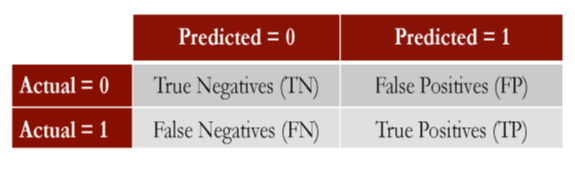

In [90]:
conf_s = confusion_matrix(y_train, y_pred_train_s)
conf_s
# 76 = true Negative ; 2 = false Positive
# 11 = false Negative ; 15 = True Positive

array([[76,  2],
       [11, 15]], dtype=int64)

In [91]:
acc_score_s = accuracy_score(y_train, y_pred_train_s)
acc_score_s

0.875

means it can classify 87 ponts out of 100 correctly to good care

In [92]:
summary_s = classification_report(y_train, y_pred_train_s)
print(summary_s)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92        78
           1       0.88      0.58      0.70        26

    accuracy                           0.88       104
   macro avg       0.88      0.78      0.81       104
weighted avg       0.88      0.88      0.87       104



##### ROC Curve

In [93]:
# based on Class 1 which is in he 2nd column of the probabilities obtained
fpr_s, tpr_s, t_s = roc_curve(y_train, pred_train_prob_s, pos_label = 1)

In [94]:
print('FPR: \n', fpr_s)

print('TPR: \n', tpr_s)

print('Threshold values: \n', t_s)

FPR: 
 [0.         0.         0.         0.         0.         0.01282051
 0.01282051 0.02564103 0.02564103 0.07692308 0.07692308 0.15384615
 0.15384615 0.24358974 0.24358974 0.30769231 0.30769231 0.32051282
 0.32051282 0.43589744 0.43589744 0.6025641  0.6025641  0.61538462
 0.61538462 1.        ]
TPR: 
 [0.         0.03846154 0.26923077 0.34615385 0.38461538 0.38461538
 0.5        0.5        0.61538462 0.61538462 0.65384615 0.65384615
 0.69230769 0.69230769 0.73076923 0.73076923 0.76923077 0.76923077
 0.84615385 0.84615385 0.92307692 0.92307692 0.96153846 0.96153846
 1.         1.        ]
Threshold values: 
 [1.99979146 0.99979146 0.8705707  0.77603829 0.77448864 0.75226899
 0.60936036 0.58341788 0.46280853 0.34518687 0.31547103 0.23432814
 0.22460556 0.18995411 0.1882286  0.17906423 0.17686589 0.1768035
 0.17063621 0.15600762 0.15442029 0.10488106 0.10159869 0.10030505
 0.09584589 0.0105768 ]


###### Observation:
t_all is the unique values of probabilties of the prediction of class 1

Text(0, 0.5, 'True Positive Rate (TPR)')

<Figure size 720x360 with 0 Axes>

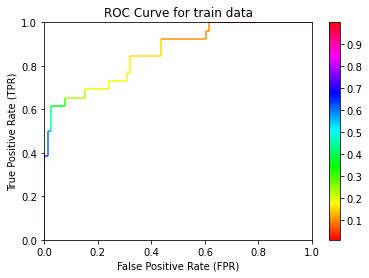

In [95]:
from matplotlib.collections import LineCollection
import matplotlib as mpl
l1 = []
for i in range(len(fpr_s)-1):
    l1.append([(fpr_s[i],tpr_s[i]),(fpr_s[i+1],tpr_s[i+1])])
#print(l1)
lc = LineCollection(l1, cmap='hsv')
plt.figure(figsize=(10,5))
fig, ax = plt.subplots()
line=ax.add_collection(lc)
lc.set_array(t_s[1:])
plt.colorbar(line, ticks=np.arange(0,1,0.1))
plt.title("ROC Curve for train data")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")

In [96]:
auc_s = auc(fpr_s,tpr_s)
auc_s

0.8604536489151874

##### Applying Threshold on Predictions

In [97]:
pred_t_s_train = np.where(pred_train_prob_s>=0.45, 1, 0)
pred_t_s_train

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1])

In [98]:
conf_s_t = confusion_matrix(y_train, pred_t_s_train)
conf_s_t

array([[76,  2],
       [10, 16]], dtype=int64)

In [99]:
accuracy_s_t = accuracy_score(y_train, pred_t_s_train)
accuracy_s_t

0.8846153846153846

In [100]:
sensitivity_s_t = recall_score(y_train, pred_t_s_train)
sensitivity_s_t

0.6153846153846154

In [101]:
precision_s_t = precision_score(y_train, pred_t_s_train)
precision_s_t

0.8888888888888888

In [102]:
summary_s_t = classification_report(y_train, pred_t_s_train)
print(summary_s_t)

              precision    recall  f1-score   support

           0       0.88      0.97      0.93        78
           1       0.89      0.62      0.73        26

    accuracy                           0.88       104
   macro avg       0.89      0.79      0.83       104
weighted avg       0.89      0.88      0.88       104



In [103]:
print(summary_all_t)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        78
           1       0.78      0.69      0.73        26

    accuracy                           0.88       104
   macro avg       0.84      0.81      0.83       104
weighted avg       0.87      0.88      0.87       104



#### 2. Testing the model

In [104]:
y_pred_test_s = model_s.predict(X_test[list(SFS_b_features)])
y_pred_test_s


array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [105]:
conf_s_t_05 = confusion_matrix(y_test, y_pred_test_s)
conf_s_t_05

array([[19,  1],
       [ 6,  1]], dtype=int64)

In [106]:
accuracy_s_test_t_05 = accuracy_score(y_test,y_pred_test_s )
accuracy_s_test_t_05

0.7407407407407407

In [107]:
sensitivity_s_test_t_05 = recall_score(y_test, y_pred_test_s)
sensitivity_s_test_t_05

0.14285714285714285

In [108]:
summary_s_test_05 = classification_report(y_test, y_pred_test_s)
print(summary_s_test_05)

              precision    recall  f1-score   support

           0       0.76      0.95      0.84        20
           1       0.50      0.14      0.22         7

    accuracy                           0.74        27
   macro avg       0.63      0.55      0.53        27
weighted avg       0.69      0.74      0.68        27



##### Customising t value to 0.45 in test

In [109]:
pred_test_prob_s = model_s.predict_proba(X_test[list(SFS_b_features)])[:, 1]
pred_test_prob_s

array([0.21414952, 0.9457603 , 0.19500066, 0.0960238 , 0.08871908,
       0.0335782 , 0.89887641, 0.06869061, 0.2802433 , 0.01113485,
       0.26815414, 0.14563995, 0.06516427, 0.38074106, 0.14606396,
       0.14947715, 0.36825706, 0.07992538, 0.09853856, 0.04074872,
       0.15767321, 0.04943225, 0.00787593, 0.21379621, 0.13119806,
       0.09861035, 0.1325135 ])

In [110]:
# applying the threshold of 0.35 on the test data
pred_t_s_test = np.where(pred_test_prob_s>=0.45, 1, 0)
pred_t_s_test

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [111]:
conf_s_t = confusion_matrix(y_test, pred_t_s_test)
conf_s_t

array([[19,  1],
       [ 6,  1]], dtype=int64)

In [112]:
accuracy_s_test_t_045 = accuracy_score(y_test, pred_t_s_test)
accuracy_s_test_t_045

0.7407407407407407

In [113]:
sensitivity_s_test_t_045 = recall_score(y_test, pred_t_s_test)
sensitivity_s_test_t_045

0.14285714285714285

In [114]:
summary_s_test_045 = classification_report(y_test, pred_t_s_test)
print(summary_s_test_045)

              precision    recall  f1-score   support

           0       0.76      0.95      0.84        20
           1       0.50      0.14      0.22         7

    accuracy                           0.74        27
   macro avg       0.63      0.55      0.53        27
weighted avg       0.69      0.74      0.68        27



##### ROC CURVE Test data

In [115]:
fpr_test_s, tpr_test_s, t_test_s = roc_curve(y_test, pred_test_prob_s, pos_label = 1)

Text(0, 0.5, 'True Positive Rate (TPR)')

<Figure size 720x360 with 0 Axes>

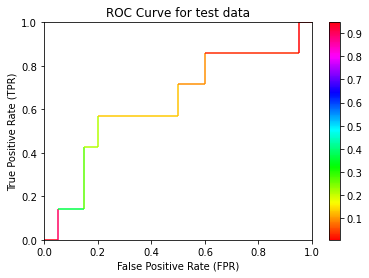

In [116]:

from matplotlib.collections import LineCollection
import matplotlib as mpl
l1 = []
for i in range(len(fpr_test_s)-1):
    l1.append([(fpr_test_s[i],tpr_test_s[i]),(fpr_test_s[i+1],tpr_test_s[i+1])])
#print(l1)
lc = LineCollection(l1, cmap='hsv')
plt.figure(figsize=(10,5))
fig, ax = plt.subplots()
line=ax.add_collection(lc)
lc.set_array(t_test_s[1:])
plt.colorbar(line, ticks=np.arange(0,1,0.1))
plt.title("ROC Curve for test data")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")

##### Test Result comparison: before and after threshold customisation

In [117]:
class style:
   BOLD = '\033[1m'
   END = '\033[0m'

print (style.BOLD + '*Test_Data_s2: Threshold = 0.5*' + style.END)
print(summary_s_test_05)


print (style.BOLD + '*Test_Data_s2: Threshold = 0.45*' + style.END)
print(summary_s_test_045)

*Test_Data_s2: Threshold = 0.5*
              precision    recall  f1-score   support

           0       0.76      0.95      0.84        20
           1       0.50      0.14      0.22         7

    accuracy                           0.74        27
   macro avg       0.63      0.55      0.53        27
weighted avg       0.69      0.74      0.68        27

*Test_Data_s2: Threshold = 0.45*
              precision    recall  f1-score   support

           0       0.76      0.95      0.84        20
           1       0.50      0.14      0.22         7

    accuracy                           0.74        27
   macro avg       0.63      0.55      0.53        27
weighted avg       0.69      0.74      0.68        27



### 2. Training the model with Selected Features by RFE

In [118]:
model_s2 = LogisticRegression()

In [119]:
model_s2.fit(X_train[list(selected_features_rfe)], y_train) # building model on poorCare (all variables)

LogisticRegression()

In [120]:
y_pred_train_s2 = model_s2.predict(X_train[list(selected_features_rfe)])
y_pred_train_s2

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [121]:
#gives the probability of 0s (1st column) and 1s (2nd Column)
pred_train_prob_rfe = model_s2.predict_proba(X_train[list(selected_features_rfe)])
pred_train_prob_s2 = pred_train_prob_rfe[:,1]
pred_train_prob_s2

array([0.09119165, 0.08814892, 0.15203735, 0.07397374, 0.16766077,
       0.93963403, 0.17315364, 0.09307307, 0.93126556, 0.37520705,
       0.17715709, 0.10822427, 0.19361612, 0.19519413, 0.0703482 ,
       0.1626753 , 0.08111995, 0.21289347, 0.29576066, 0.09453672,
       0.06187241, 0.43629239, 0.13602854, 0.06035157, 0.56658201,
       0.07859345, 0.55920742, 0.09985892, 0.03638007, 0.05641627,
       0.25857367, 0.20315328, 0.05906485, 0.49040077, 0.16476263,
       0.11418952, 0.13129373, 0.08961787, 0.06423   , 0.18458286,
       0.78218765, 0.03027155, 0.56458563, 0.17677134, 0.02352438,
       0.06256785, 0.89817493, 0.38334634, 0.26692535, 0.07187917,
       0.23864738, 0.06105052, 0.44699461, 0.17578138, 0.05488848,
       0.11470791, 0.14159329, 0.12655242, 0.0826299 , 0.15106749,
       0.98219442, 0.97143099, 0.10837946, 0.51892529, 0.07454177,
       0.17948023, 0.05039916, 0.08037915, 0.05125855, 0.254376  ,
       0.04808412, 0.99981086, 0.07533308, 0.77473487, 0.12506

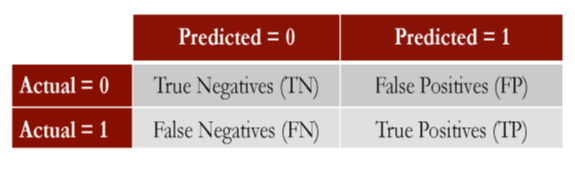

In [122]:
conf_s2 = confusion_matrix(y_train, y_pred_train_s2)
conf_s2
# 76 = true Negative ; 2 = false Positive
# 11 = false Negative ; 15 = True Positive

array([[76,  2],
       [13, 13]], dtype=int64)

In [123]:
acc_score_s2 = accuracy_score(y_train, y_pred_train_s2)
acc_score_s2

0.8557692307692307

means it can classify 87 ponts out of 100 correctly to good care

In [124]:
summary_s2 = classification_report(y_train, y_pred_train_s2)
print(summary_s2)

              precision    recall  f1-score   support

           0       0.85      0.97      0.91        78
           1       0.87      0.50      0.63        26

    accuracy                           0.86       104
   macro avg       0.86      0.74      0.77       104
weighted avg       0.86      0.86      0.84       104



##### ROC Curve

In [125]:
# based on Class 1 which is in he 2nd column of the probabilities obtained
fpr_s2, tpr_s2, t_s2 = roc_curve(y_train, pred_train_prob_s2, pos_label = 1)

In [126]:
print('FPR: \n', fpr_s2)

print('TPR: \n', tpr_s2)

print('Threshold values: \n', t_s2)

FPR: 
 [0.         0.         0.         0.         0.01282051 0.01282051
 0.02564103 0.02564103 0.06410256 0.06410256 0.1025641  0.1025641
 0.14102564 0.14102564 0.15384615 0.15384615 0.20512821 0.20512821
 0.24358974 0.24358974 0.25641026 0.25641026 0.29487179 0.29487179
 0.32051282 0.32051282 0.47435897 0.47435897 0.57692308 0.57692308
 1.        ]
TPR: 
 [0.         0.03846154 0.34615385 0.42307692 0.42307692 0.5
 0.5        0.53846154 0.53846154 0.57692308 0.57692308 0.61538462
 0.61538462 0.65384615 0.65384615 0.69230769 0.69230769 0.73076923
 0.73076923 0.80769231 0.80769231 0.84615385 0.84615385 0.88461538
 0.88461538 0.92307692 0.92307692 0.96153846 0.96153846 1.
 1.        ]
Threshold values: 
 [1.99999961 0.99999961 0.78218765 0.77473487 0.56658201 0.55920742
 0.51892529 0.49138223 0.43629239 0.38334634 0.35538842 0.35037382
 0.31732298 0.29576066 0.26692535 0.26649488 0.21289347 0.20315328
 0.19361612 0.18458286 0.17948023 0.17715709 0.17509018 0.17315364
 0.16476263 0.1626

###### Observation:
t_all is the unique values of probabilties of the prediction of class 1

Text(0, 0.5, 'True Positive Rate (TPR)')

<Figure size 720x360 with 0 Axes>

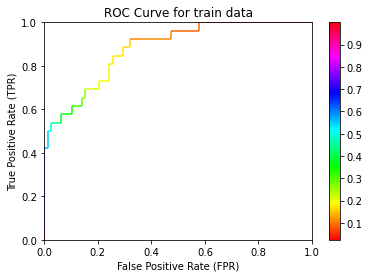

In [127]:
from matplotlib.collections import LineCollection
import matplotlib as mpl
l1 = []
for i in range(len(fpr_s2)-1):
    l1.append([(fpr_s2[i],tpr_s2[i]),(fpr_s2[i+1],tpr_s2[i+1])])
#print(l1)
lc = LineCollection(l1, cmap='hsv')
plt.figure(figsize=(10,5))
fig, ax = plt.subplots()
line=ax.add_collection(lc)
lc.set_array(t_s2[1:])
plt.colorbar(line, ticks=np.arange(0,1,0.1))
plt.title("ROC Curve for train data")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")

In [128]:
auc_s2 = auc(fpr_s2,tpr_s2)
auc_s2

0.8796844181459567

##### Applying Threshold on Predictions

In [129]:
pred_t_s2_train = np.where(pred_train_prob_s2>=0.45, 1, 0)
pred_t_s2_train

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [130]:
conf_s2_t = confusion_matrix(y_train, pred_t_s2_train)
conf_s2_t

array([[75,  3],
       [12, 14]], dtype=int64)

In [131]:
accuracy_s2_t = accuracy_score(y_train, pred_t_s2_train)
accuracy_s2_t

0.8557692307692307

In [132]:
sensitivity_s2_t = recall_score(y_train, pred_t_s2_train)
sensitivity_s2_t

0.5384615384615384

In [133]:
precision_s2_t = precision_score(y_train, pred_t_s2_train)
precision_s2_t

0.8235294117647058

In [134]:
summary_s2_t = classification_report(y_train, pred_t_s2_train)
print(summary_s2_t)

              precision    recall  f1-score   support

           0       0.86      0.96      0.91        78
           1       0.82      0.54      0.65        26

    accuracy                           0.86       104
   macro avg       0.84      0.75      0.78       104
weighted avg       0.85      0.86      0.84       104



In [135]:
print(summary_s_t)

              precision    recall  f1-score   support

           0       0.88      0.97      0.93        78
           1       0.89      0.62      0.73        26

    accuracy                           0.88       104
   macro avg       0.89      0.79      0.83       104
weighted avg       0.89      0.88      0.88       104



In [136]:
print(summary_all_t)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        78
           1       0.78      0.69      0.73        26

    accuracy                           0.88       104
   macro avg       0.84      0.81      0.83       104
weighted avg       0.87      0.88      0.87       104



#### 2. Testing the model

In [137]:
y_pred_test_s2 = model_s2.predict(X_test[list(selected_features_rfe)])
y_pred_test_s2


array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [138]:
conf_s2_t_05 = confusion_matrix(y_test, y_pred_test_s2)
conf_s2_t_05

array([[19,  1],
       [ 5,  2]], dtype=int64)

In [139]:
accuracy_s2_test_t_05 = accuracy_score(y_test,y_pred_test_s2 )
accuracy_s2_test_t_05

0.7777777777777778

In [140]:
sensitivity_s2_test_t_05 = recall_score(y_test, y_pred_test_s2)
sensitivity_s2_test_t_05

0.2857142857142857

In [141]:
summary_s2_test_05 = classification_report(y_test, y_pred_test_s2)
print(summary_s2_test_05)

              precision    recall  f1-score   support

           0       0.79      0.95      0.86        20
           1       0.67      0.29      0.40         7

    accuracy                           0.78        27
   macro avg       0.73      0.62      0.63        27
weighted avg       0.76      0.78      0.74        27



##### Customising t value to 0.45 in test

In [142]:
pred_test_prob_s2 = model_s2.predict_proba(X_test[list(selected_features_rfe)])[:, 1]
pred_test_prob_s2

array([0.2467002 , 0.9453353 , 0.35604083, 0.04587267, 0.05733642,
       0.39855241, 0.99367587, 0.07832169, 0.14858926, 0.16263861,
       0.67470308, 0.07923522, 0.13386421, 0.20766951, 0.10117905,
       0.12233437, 0.0959077 , 0.06169265, 0.08769762, 0.2464326 ,
       0.15925364, 0.03662126, 0.01421934, 0.31024634, 0.1736315 ,
       0.14837777, 0.07775931])

In [143]:
# applying the threshold of 0.35 on the test data
pred_t_s2_test = np.where(pred_test_prob_s2>=0.45, 1, 0)
pred_t_s2_test

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [144]:
conf_s2_t = confusion_matrix(y_test, pred_t_s2_test)
conf_s2_t

array([[19,  1],
       [ 5,  2]], dtype=int64)

In [145]:
accuracy_s2_test_t_045 = accuracy_score(y_test, pred_t_s2_test)
accuracy_s2_test_t_045

0.7777777777777778

In [146]:
sensitivity_s2_test_t_045 = recall_score(y_test, pred_t_s2_test)
sensitivity_s2_test_t_045

0.2857142857142857

In [147]:
summary_s2_test_045 = classification_report(y_test, pred_t_s2_test)
print(summary_s2_test_045)

              precision    recall  f1-score   support

           0       0.79      0.95      0.86        20
           1       0.67      0.29      0.40         7

    accuracy                           0.78        27
   macro avg       0.73      0.62      0.63        27
weighted avg       0.76      0.78      0.74        27



##### ROC CURVE Test data

In [148]:
fpr_test_s2, tpr_test_s2, t_test_s2 = roc_curve(y_test, pred_test_prob_s2, pos_label = 1)

Text(0, 0.5, 'True Positive Rate (TPR)')

<Figure size 720x360 with 0 Axes>

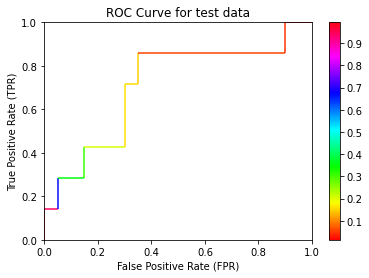

In [149]:

from matplotlib.collections import LineCollection
import matplotlib as mpl
l1 = []
for i in range(len(fpr_test_s2)-1):
    l1.append([(fpr_test_s2[i],tpr_test_s2[i]),(fpr_test_s2[i+1],tpr_test_s2[i+1])])
#print(l1)
lc = LineCollection(l1, cmap='hsv')
plt.figure(figsize=(10,5))
fig, ax = plt.subplots()
line=ax.add_collection(lc)
lc.set_array(t_test_s2[1:])
plt.colorbar(line, ticks=np.arange(0,1,0.1))
plt.title("ROC Curve for test data")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")

##### Test Result comparison: before and after threshold customisation

In [150]:
class style:
   BOLD = '\033[1m'
   END = '\033[0m'

print (style.BOLD + '*Test_Data_s2: Threshold = 0.5*' + style.END)
print(summary_s2_test_05)


print (style.BOLD + '*Test_Data_s2: Threshold = 0.45*' + style.END)
print(summary_s2_test_045)

*Test_Data_s2: Threshold = 0.5*
              precision    recall  f1-score   support

           0       0.79      0.95      0.86        20
           1       0.67      0.29      0.40         7

    accuracy                           0.78        27
   macro avg       0.73      0.62      0.63        27
weighted avg       0.76      0.78      0.74        27

*Test_Data_s2: Threshold = 0.45*
              precision    recall  f1-score   support

           0       0.79      0.95      0.86        20
           1       0.67      0.29      0.40         7

    accuracy                           0.78        27
   macro avg       0.73      0.62      0.63        27
weighted avg       0.76      0.78      0.74        27



## 8. Model Selection and Conclusion

### Training Data Comparison after thresholding

In [151]:
print('Summary: \n')

print(style.BOLD + ' 1. Model with All features selected with customised threshold of 0.35'  + style.END)
print(summary_all_t)

print(style.BOLD + '2. Model with features selected by Backward Elimination with customised threshold of 0.45 \n Features: \n ',format(list(SFS_b_features))  + style.END)
print(summary_s_t)

print(style.BOLD + '3. Model with features selected by RFE with customised threshold of 0.45 \n Features: \n ',format(list(selected_features_rfe))  + style.END)
print(summary_s2_t)

Summary: 

 1. Model with All features selected with customised threshold of 0.35
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        78
           1       0.78      0.69      0.73        26

    accuracy                           0.88       104
   macro avg       0.84      0.81      0.83       104
weighted avg       0.87      0.88      0.87       104

2. Model with features selected by Backward Elimination with customised threshold of 0.45 
 Features: 
  ['InpatientDays', 'ERVisits', 'OfficeVisits', 'Narcotics', 'Pain', 'ProviderCount', 'ClaimLines', 'StartedOnCombination']
              precision    recall  f1-score   support

           0       0.88      0.97      0.93        78
           1       0.89      0.62      0.73        26

    accuracy                           0.88       104
   macro avg       0.89      0.79      0.83       104
weighted avg       0.89      0.88      0.88       104

3. Model with features selected by RF

In [152]:
print('Area under the curve: \n')

print(style.BOLD + ' 1. Model with All features selected \n'  + style.END)
print('AUC :', auc_all)

print(style.BOLD + '\n 2. Model with features selected by Backward Elimination \n Features: \n ',format(list(SFS_b_features))  + style.END)
print('\n AUC :', auc_s)

print(style.BOLD + '\n 3. Model with features selected by RFE  \n Features: \n ',format(list(selected_features_rfe))  + style.END)
print('\n AUC :', auc_s2)

Area under the curve: 

 1. Model with All features selected 

AUC : 0.8949704142011834

 2. Model with features selected by Backward Elimination 
 Features: 
  ['InpatientDays', 'ERVisits', 'OfficeVisits', 'Narcotics', 'Pain', 'ProviderCount', 'ClaimLines', 'StartedOnCombination']

 AUC : 0.8604536489151874

 3. Model with features selected by RFE  
 Features: 
  ['Narcotics', 'DaysSinceLastERVisit', 'ProviderCount', 'ClaimLines', 'StartedOnCombination', 'AcuteDrugGapSmall']

 AUC : 0.8796844181459567


### Testing Data Comparison

#### Before Thresholding

In [153]:
print(style.BOLD + ' 1. Model with All features selected'  + style.END)
print(summary_all_test_05)

print(style.BOLD + '2. Model with features selected by Backward Elimination \n Features: \n ',format(list(SFS_b_features))  + style.END)
print(summary_s_test_05)

print(style.BOLD + '3. Model with features selected by RFE  \n Features: \n ',format(list(selected_features_rfe))  + style.END)
print(summary_s2_test_05)

 1. Model with All features selected
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        20
           1       0.33      0.14      0.20         7

    accuracy                           0.70        27
   macro avg       0.54      0.52      0.51        27
weighted avg       0.64      0.70      0.66        27

2. Model with features selected by Backward Elimination 
 Features: 
  ['InpatientDays', 'ERVisits', 'OfficeVisits', 'Narcotics', 'Pain', 'ProviderCount', 'ClaimLines', 'StartedOnCombination']
              precision    recall  f1-score   support

           0       0.76      0.95      0.84        20
           1       0.50      0.14      0.22         7

    accuracy                           0.74        27
   macro avg       0.63      0.55      0.53        27
weighted avg       0.69      0.74      0.68        27

3. Model with features selected by RFE  
 Features: 
  ['Narcotics', 'DaysSinceLastERVisit', 'ProviderCount', 'Claim

#### After Thresholding

In [154]:
print(style.BOLD + ' 1. Model with All features selected with customised threshold of 0.35'  + style.END)
print(summary_all_test_035)

print(style.BOLD + '2. Model with features selected by Backward Elimination with customised threshold of 0.45 \n Features: \n ',format(list(SFS_b_features))  + style.END)
print(summary_s_test_045)

print(style.BOLD + '3. Model with features selected by RFE with customised threshold of 0.45 \n Features: \n ',format(list(selected_features_rfe))  + style.END)
print(summary_s2_test_045)

 1. Model with All features selected with customised threshold of 0.35
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        20
           1       0.50      0.43      0.46         7

    accuracy                           0.74        27
   macro avg       0.65      0.64      0.65        27
weighted avg       0.73      0.74      0.73        27

2. Model with features selected by Backward Elimination with customised threshold of 0.45 
 Features: 
  ['InpatientDays', 'ERVisits', 'OfficeVisits', 'Narcotics', 'Pain', 'ProviderCount', 'ClaimLines', 'StartedOnCombination']
              precision    recall  f1-score   support

           0       0.76      0.95      0.84        20
           1       0.50      0.14      0.22         7

    accuracy                           0.74        27
   macro avg       0.63      0.55      0.53        27
weighted avg       0.69      0.74      0.68        27

3. Model with features selected by RFE with cust

### Conclusion:

After comparison of different models with different features on the testing data after thresholding, we conclude Model with Features selected by **RFE** is the most optimum one. It has a descent Area under the curve and beats the rest of the model in testing accuracy.

In [155]:
overall_dict = {'Features chosen' : [list((selected_features_rfe))], 'Area under the Curve' : [auc_s2] , 'Accuracy of training/testing model' : [str(round(accuracy_s2_t,3)) + ' ' + str(round(accuracy_s2_test_t_045,3))], 'F1-score of training/testing model' : [str(0.65) + ' ' + str(0.40)], 'Threshold Custimised' : [0.45] }

Table_final = pd.DataFrame(overall_dict)

Table_final



Features chosen  Area under the Curve  \
0  [Narcotics, DaysSinceLastERVisit, ProviderCoun...              0.879684   

  Accuracy of training/testing model F1-score of training/testing model  \
0                        0.856 0.778                           0.65 0.4   

   Threshold Custimised  
0                  0.45

In [156]:
print('\n Features Chosen: \n', list((selected_features_rfe)))


 Features Chosen: 
 ['Narcotics', 'DaysSinceLastERVisit', 'ProviderCount', 'ClaimLines', 'StartedOnCombination', 'AcuteDrugGapSmall']
